In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax  
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [2]:
from PIL import Image
jpgfile = Image.open("sxedio.jpg")
jpgfile.show()

In [3]:
def generate_random(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

def two_three_d_blobs(n):
    '''
    Generate 2 blobs, of n 3d data points each, then plot them.
    '''
    
    # initialize data list
    data = []
    
    # config 3d plot
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    
    # defire the scaler to make our data zero-mean.
    scaler = StandardScaler(with_std=False)
    
    # generate the 2 blobs 
    for c, m, vmin, vmax, i in [('r', 'o', np.random.uniform(1,10), np.random.uniform(1,10), 0), 
                                ('b', '^', np.random.uniform(1,10), np.random.uniform(1,10), 1)]:
        # generate the features-axis of the data points.
        x1 = generate_random(n, vmin, vmax)
        x2 = generate_random(n, vmin, vmax)
        x3 = generate_random(n, vmin, vmax)
        # keep blob (which is an array (n,3)) in a list called data.
        new_data = np.vstack((x1,x2,x3)).T # (50,3)
        new_data_scaled = scaler.fit_transform(new_data)
        data.append(new_data_scaled)
        # plot the data points
        ax.scatter(new_data_scaled[:,0], new_data_scaled[:,1], new_data_scaled[:,2], 
                   c=c, marker=m)
        # SVD
        C = np.cov(new_data_scaled.T)
        eigenvals, eigenvecs = np.linalg.eig(C)
        # plot also the eigenvecs
        for i in range(len(eigenvecs)):
            x1axis = [0]
            x2axis = [0]
            x3axis = [0]
            x1axis.append(eigenvecs[0,i])
            x2axis.append(eigenvecs[1,i])
            x3axis.append(eigenvecs[2,i])
            ax.plot(x1axis, x2axis, x3axis, c = c)
    
    # set labels 
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('x3')

    plt.show()
    
    return data, eigenvals, eigenvecs, C

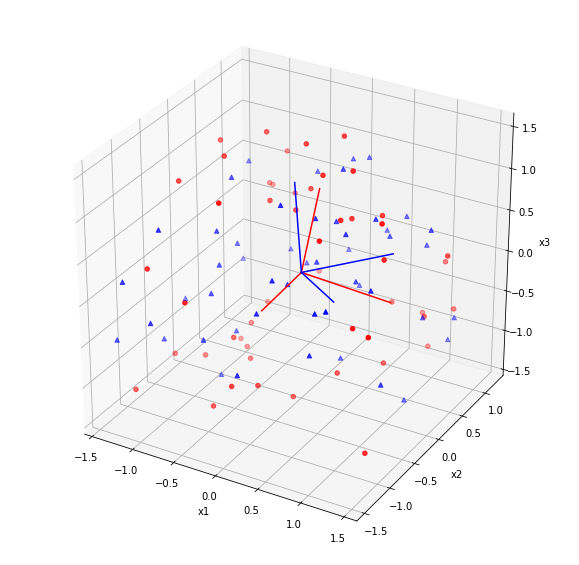

In [6]:
np.random.seed(1)

data, eigenvals, eigenvecs, C = two_three_d_blobs(50)

Notice the 2 blobs (red and blue), the 3 eigenvectors.

In [7]:
# my first 10 data points of the first blob
print ('1st blob:\n', data[0][:10])
# and of the second blob
print ('2nd blob:\n', data[1][:10])

1st blob:
 [[-0.85967526 -0.08636254  1.20919987]
 [-1.00821937 -1.28255587  0.43075119]
 [-0.75183943  0.13896088 -1.22766128]
 [-0.31699324 -1.02769253  1.26625675]
 [-0.17721304  0.18041972  0.61510791]
 [ 0.21054201  0.48192526  1.45156564]
 [-0.11599344 -1.14887622 -0.80040714]
 [ 0.61018092 -0.2979629  -0.89650636]
 [-0.70218021  0.46729886  1.27487784]
 [ 1.13673874 -0.29762638  0.63127126]]
2nd blob:
 [[-0.73747559 -0.3932507   0.08776425]
 [ 0.5993869  -0.13218054  0.69738893]
 [-0.89223137  0.18964507  0.00615283]
 [ 0.15748275  0.04069289  0.15130286]
 [ 1.21462676  1.06512238 -0.7802845 ]
 [ 0.87955119  1.04486412  0.03912378]
 [-0.77141526 -0.38001019  0.48299038]
 [-0.08075674  1.16598164  0.7775409 ]
 [ 0.26246462 -0.98090444  0.49675456]
 [ 0.83100554 -1.11044583  0.34164879]]


In [8]:
# check that my data in indeed scaled to zero-mean.
print (np.mean(data[1]))
print (np.mean(data[0]))

-1.92438657602e-16
-4.32246830921e-16


Ok. They are centered around (0,0,0).

In [9]:
# correlation matrix is the result of (3,50) dot (50,3) -> (3,3)
C

array([[ 0.65891259,  0.14028291,  0.02067523],
       [ 0.14028291,  0.71352316, -0.01481833],
       [ 0.02067523, -0.01481833,  0.42187545]])

In [10]:
eigenvals

array([ 0.82914075,  0.54839292,  0.41677753])

In [11]:
eigenvecs

array([[ 0.63626421,  0.75587056, -0.15436177],
       [ 0.77145962, -0.62448568,  0.12193313],
       [ 0.00423105,  0.19666556,  0.9804615 ]])

In [12]:
# principal component
index = np.argmax(eigenvals, axis=0)
pc = eigenvecs[:,index]
pc

array([ 0.63626421,  0.77145962,  0.00423105])

We expect Sanger's weights to converge to the two first principal components. The first is shown above.

No onto the Sanger's rule...

\begin{equation*}
ΔW_{i} = C*W_{i} - \sum_{k=1}^i (W_{k}.T * C *W_{i}) * W_{i}
\end{equation*}

, where <p> 
- i = 1,2 (the number of output units) and <p>
- ΔW_{i} the (3,1) matrix from output i to the j inputs, where j=1..3.

More explicitly,

\begin{equation*}
ΔW_{ij} = V_{i}*X_{j} - V_{i}*(\sum_{k=1}^i V_{k}*W_{kj}) \\\
= (\sum_{p=1}^3 W_{ip}*X_{p})*X_{j} - (\sum_{p=1}^3 W_{ip}*X_{p}) * \sum_{k=1}^i(\sum_{q=1}^3 W_{kq}*X_{q})*W_{kj} \\\
= (\sum_{p=1}^3 W_{ip}*X_{p})*X_{j} - \sum_{k=1}^i (\sum_{p,q=1}^3 W_{ip}*X_{p}*W_{kq}*X_{q}) * W_{kj} \\\
= (\sum_{p=1}^3 W_{ip}*C_{pj}) - \sum_{k=1}^i (\sum_{p,q=1}^3 W_{ip}*W_{kq}*C_{pq}) * W_{kj}
\end{equation*}



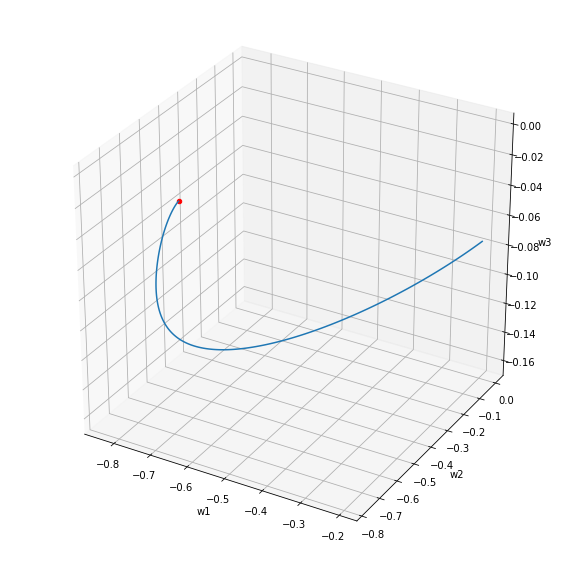

In [14]:
# Sanger's rule

# make results repeatable
np.random.seed(1000) 

# initialize randomly the weights, w. Here i'm planning my weights 
# s.t. i am creating a 3-input, 2-output net. 
w = np.random.normal(scale=0.25, size=(3,2))

# Set the threshold of tolerance, close to 0.
# This will be the flag point to end the loop,
# when the difference between new and the previous
# weights is almost zero. Then, we need also to 
# initialize the weights we will keep as flag, w_prev.
threshold = 1e-8
w_prev = np.ones((3,2))

# update rule
learning_rate = 0.001
listw1 = []
listw2 = []
listw3 = []
while np.linalg.norm(w - w_prev) > threshold:
    w_prev = w.copy()
    for i in range(2): # 2 output units
        rule = np.dot(C, w[:,i]) - np.dot(w[:,:i+1], np.dot(w[:,:i+1].T, np.dot(C, w[:,i])))
        # 3,3 dot 3,1 - 3,k dot k,3 dot 3,3 dot 3,1
        w[:,i] += learning_rate * rule # 3,1 = 3,1
        # keep a list of the w1,w2,w3 axis to plot next, that is 
        # the convergence of the sanger weights that correspond to the first 
        # output unit - w[:,0] - , to the principal component.    
        listw1.append(w_prev[0,0])
        listw2.append(w_prev[1,0])
        listw3.append(w_prev[2,0])
    
# append the last w_oja point to my lists
listw1.append(w[0,0])
listw2.append(w[1,0])
listw3.append(w[2,0])

# plot 
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.plot(listw1, listw2, listw3)    

ax.scatter(-pc[0], -pc[1], -pc[2], color='r')

ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('w3')
plt.show()

Notice how the weights corresponding to the first output (the `w[:,0]`) converge to the principal component and the weight corresponding to the second output `(w[:,1]`) converges to the second largest component !!! Well in fact they converge to their negative vectors, which translates however into the same thing..

In [15]:
w

array([[-0.63626426, -0.75588219],
       [-0.77145958,  0.62449504],
       [-0.00423107, -0.19659108]])